# Fillrandom
FillRandom example




**Author:** Wim Lavrijsen  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:27 AM.</small></i>

In [1]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile
from ROOT import gROOT, gBenchmark



c1 = TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )

pad1 = TPad( 'pad1', 'The pad with the function',  0.05, 0.50, 0.95, 0.95, 21 )
pad2 = TPad( 'pad2', 'The pad with the histogram', 0.05, 0.05, 0.95, 0.45, 21 )
pad1.Draw()
pad2.Draw()
pad1.cd()

gBenchmark.Start( 'fillrandom' )

Welcome to JupyROOT 6.18/03


A function (any dimension) or a formula may reference
an already defined formula

In [2]:
form1 = TFormula( 'form1', 'abs(sin(x)/x)' )
sqroot = TF1( 'sqroot', 'x*gaus(0) + [3]*form1', 0, 10 )
sqroot.SetParameters( 10, 4, 1, 20 )
pad1.SetGridx()
pad1.SetGridy()
pad1.GetFrame().SetFillColor( 42 )
pad1.GetFrame().SetBorderMode( -1 )
pad1.GetFrame().SetBorderSize( 5 )
sqroot.SetLineColor( 4 )
sqroot.SetLineWidth( 6 )
sqroot.Draw()
lfunction = TPaveLabel( 5, 39, 9.8, 46, 'The sqroot function' )
lfunction.SetFillColor( 41 )
lfunction.Draw()
c1.Update()

Create a one dimensional histogram (one float per bin)
and fill it following the distribution in function sqroot.

In [3]:
pad2.cd();
pad2.GetFrame().SetFillColor( 42 )
pad2.GetFrame().SetBorderMode( -1 )
pad2.GetFrame().SetBorderSize( 5 )
h1f = TH1F( 'h1f', 'Test random numbers', 200, 0, 10 )
h1f.SetFillColor( 45 )
h1f.FillRandom( 'sqroot', 10000 )
h1f.Draw()
c1.Update()

Open a ROOT file and save the formula, function and histogram

In [4]:
myfile = TFile( 'py-fillrandom.root', 'RECREATE' )
form1.Write()
sqroot.Write()
h1f.Write()
myfile.Close()
gBenchmark.Show( 'fillrandom' )

fillrandom: Real Time =   0.60 seconds Cpu Time =   0.55 seconds


Draw all canvases 

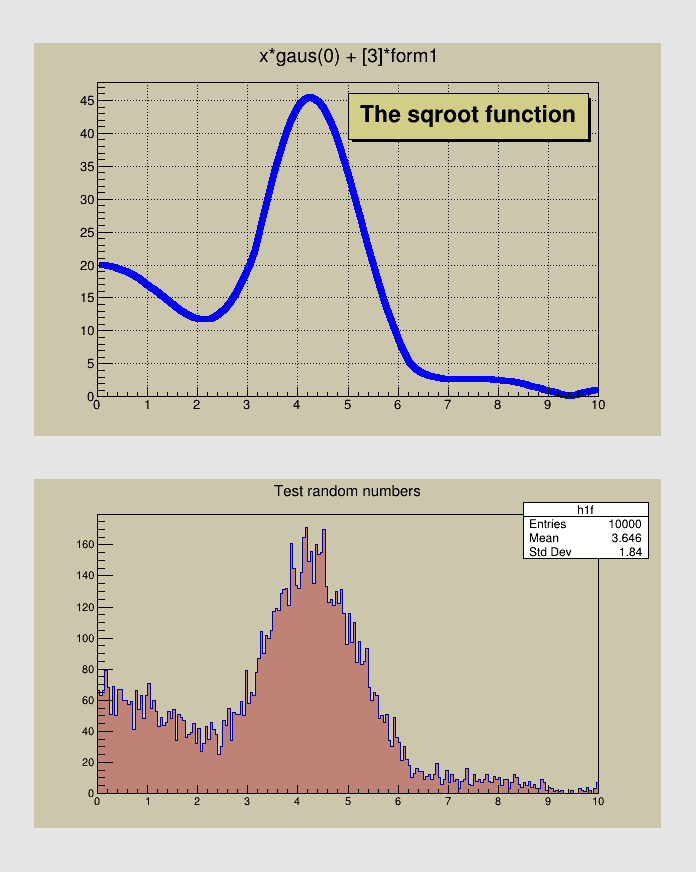

In [5]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()